# Chapter 3 - Section 3.2

## Import libraries and parameters' initialisation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import quad
from scipy.special import gamma as gamma_function
from scipy.stats import norm
from scipy.optimize import brentq
# import mibian
from matplotlib.colors import ListedColormap


In [3]:
# Parameters for the Variance Gamma process
nu = 0.17    # variance rate, kurtosis parameter [0.001, 10], large nu - less frequent, larger jumps
theta = 0.15   # skewness parameter [-10, 10], theta > 0 - right skewed, more positive jumps
sigma = 0.12
r = 0.025

# Define a constant time grid (10 yr time horizon, monthly / weekly time steps)
T = 10
N_time = T * 12 * 4 + 1
time_grid = np.linspace(0, T, N_time)
dti = T / (N_time - 1)

# Define number of paths for multiple paths case
N_paths = 10

## Producing one path of VG as Gamma time changed Brownian motion

In [4]:
# Generate a sample of size 1000 from the Gamma and standard normal distribution
dG_i = np.random.gamma(dti / nu, nu, N_time - 1)
Z_i = np.random.normal(0, 1, N_time - 1)

# Each element is the sum of previous elements
sum_dGi = np.cumsum(dG_i)
sum_root_dGi_Zi = np.cumsum(dG_i**0.5 * Z_i)

# Calculate VG path
VG_path = np.zeros(N_time)
VG_path[1:] = theta * sum_dGi + sigma * sum_root_dGi_Zi

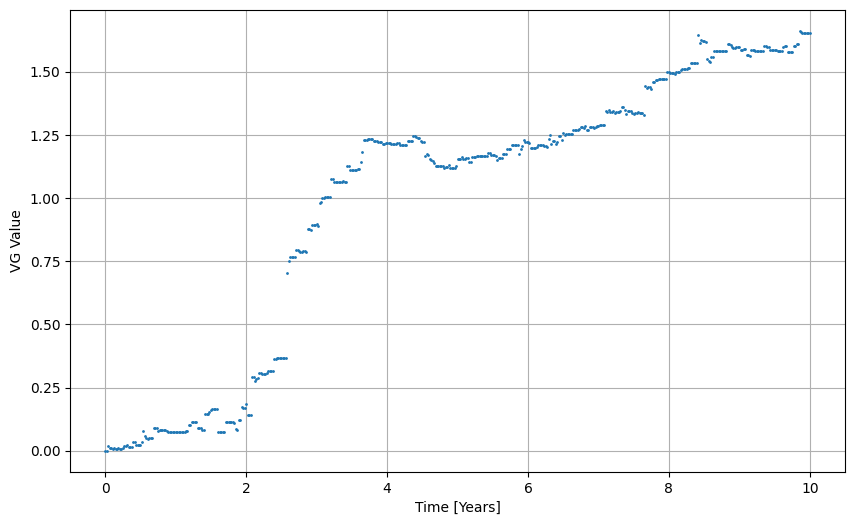

In [5]:
# Plot the VG path
plt.figure(figsize=(10, 6))
plt.plot(time_grid, VG_path, marker='.', linestyle='None', markersize=2) #label='VG Process Path'
# plt.title('Variance Gamma Process Path')
plt.xlabel('Time [Years]')
plt.ylabel('VG Value')
plt.grid()
# plt.legend()
plt.show()

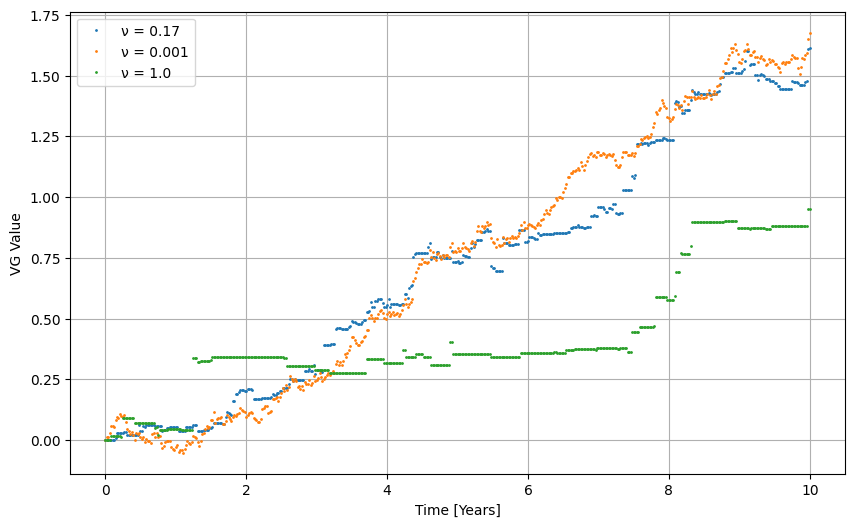

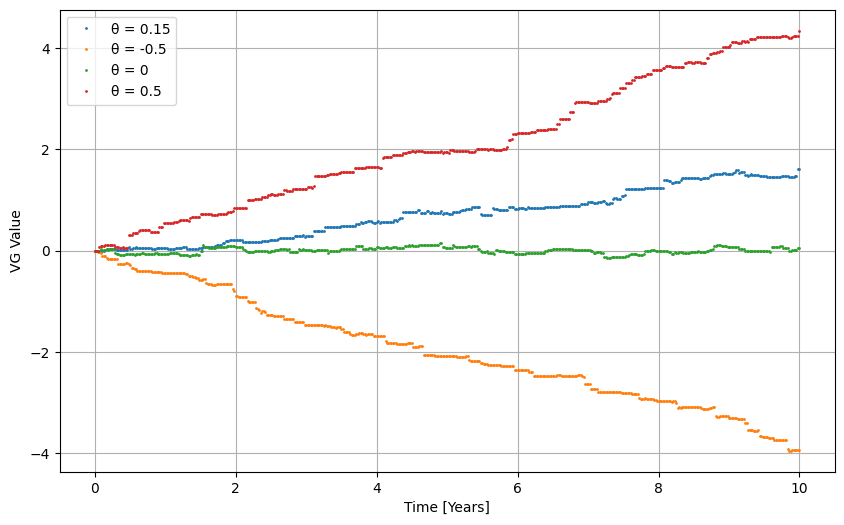

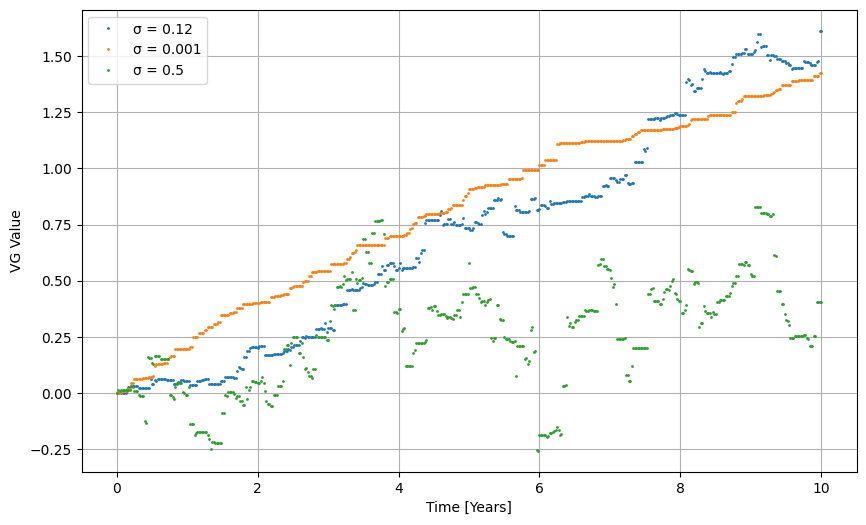

In [6]:
# Set random seed for reproducibility
np.random.seed(42)

# Parameters for the Variance Gamma process
nu_ref = 0.17
theta_ref = 0.15
sigma_ref = 0.12
r = 0.025

# Time grid (10 year time horizon, weekly time steps)
T = 10
N_time = T * 12 * 4 + 1
time_grid = np.linspace(0, T, N_time)
dti = T / (N_time - 1)

# Generate the normal random values once
Z_i = np.random.normal(0, 1, N_time - 1)

def generate_VG_path(nu, theta, sigma, Z_i):
    dG_i = np.random.gamma(dti / nu, nu, N_time - 1)
    sum_dGi = np.cumsum(dG_i)
    sum_root_dGi_Zi = np.cumsum(dG_i**0.5 * Z_i)
    VG_path = np.zeros(N_time)
    VG_path[1:] = theta * sum_dGi + sigma * sum_root_dGi_Zi
    return VG_path

# Reference VG path
VG_path_ref = generate_VG_path(nu_ref, theta_ref, sigma_ref, Z_i)

# Paths with varying nu
nu_values = [0.001, 1.0]
VG_paths_nu = [generate_VG_path(nu, theta_ref, sigma_ref, Z_i) for nu in nu_values]

# Paths with varying theta
theta_values = [-0.5, 0, 0.5]
VG_paths_theta = [generate_VG_path(nu_ref, theta, sigma_ref, Z_i) for theta in theta_values]

# Paths with varying sigma
sigma_values = [0.001, 0.5]
VG_paths_sigma = [generate_VG_path(nu_ref, theta_ref, sigma, Z_i) for sigma in sigma_values]

# Plot VG paths with varying nu
plt.figure(figsize=(10, 6))
plt.plot(time_grid, VG_path_ref, label='ν = 0.17', marker='.', linestyle='None', markersize=2)
for path, nu in zip(VG_paths_nu, nu_values):
    plt.plot(time_grid, path, marker='.', linestyle='None', markersize=2, label=f'ν = {nu}')
plt.xlabel('Time [Years]')
plt.ylabel('VG Value')
plt.legend()
plt.grid()
# plt.title('VG Process with Varying ν')
plt.savefig('VG_varying_nu.png')
plt.show()

# Plot VG paths with varying theta
plt.figure(figsize=(10, 6))
plt.plot(time_grid, VG_path_ref, label='θ = 0.15', marker='.', linestyle='None', markersize=2)
for path, theta in zip(VG_paths_theta, theta_values):
    plt.plot(time_grid, path, marker='.', linestyle='None', markersize=2, label=f'θ = {theta}')
plt.xlabel('Time [Years]')
plt.ylabel('VG Value')
plt.legend()
plt.grid()
# plt.title('VG Process with Varying θ')
plt.savefig('VG_varying_theta.png')
plt.show()

# Plot VG paths with varying sigma
plt.figure(figsize=(10, 6))
plt.plot(time_grid, VG_path_ref, label='σ = 0.12', marker='.', linestyle='None', markersize=2)
for path, sigma in zip(VG_paths_sigma, sigma_values):
    plt.plot(time_grid, path, marker='.', linestyle='None', markersize=2, label=f'σ = {sigma}')
plt.xlabel('Time [Years]')
plt.ylabel('VG Value')
plt.legend()
plt.grid()
# plt.title('VG Process with Varying σ')
plt.savefig('VG_varying_sigma.png')
plt.show()

## Producing multiple paths

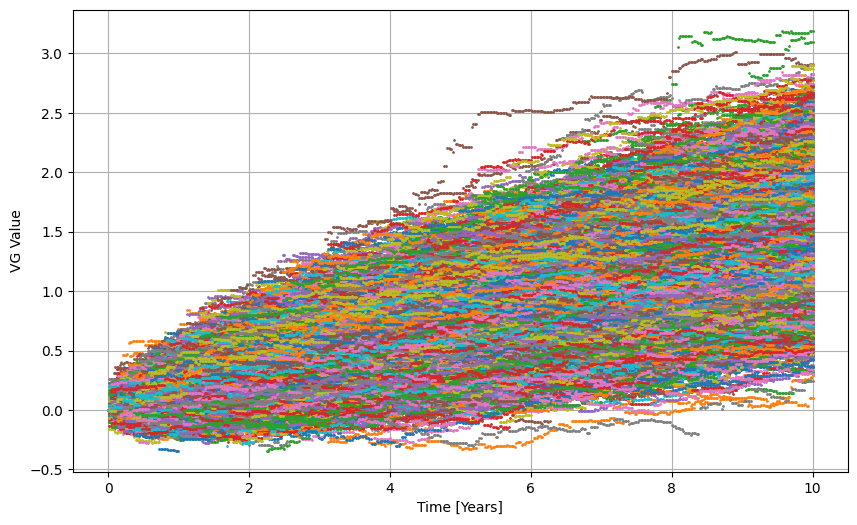

In [7]:
# Parameters for the Variance Gamma process
nu = 0.17    # variance rate, kurtosis parameter [0.001, 10], large nu - less frequent, larger jumps
theta = 0.15   # skewness parameter [-10, 10], theta > 0 - right skewed, more positive jumps
sigma = 0.12
r = 0.025

# Define a constant time grid (10 yr time horizon, monthly / weekly time steps)
T = 10
N_time = T * 12 * 4 + 1
time_grid = np.linspace(0, T, N_time)
dti = T / (N_time - 1)

# Define number of paths for multiple paths case
N_paths = 5000

# Generate samples from the Gamma and standard normal distributions for multiple paths
dG_i = np.random.gamma(dti / nu, nu, (N_paths, N_time - 1))
Z_i = np.random.normal(0, 1, (N_paths, N_time - 1))

# Each element is the sum of previous elements along the time axis
sum_dGi = np.cumsum(dG_i, axis=1)
sum_root_dGi_Zi = np.cumsum(np.sqrt(dG_i) * Z_i, axis=1)

# Initialize the VG paths array
VG_paths = np.zeros((N_paths, N_time))

# Calculate VG paths
VG_paths[:, 1:] = theta * sum_dGi + sigma * sum_root_dGi_Zi

# Plot the VG paths
plt.figure(figsize=(10, 6))
for j in range(N_paths):
    plt.plot(time_grid, VG_paths[j], marker='.', linestyle='None', markersize=2, label=f'VG Process Path {j+1}')

# plt.title(f'{N_paths} Variance Gamma Process Paths')
plt.xlabel('Time [Years]')
plt.ylabel('VG Value')
plt.grid()
# plt.legend()
plt.show()

## Sample vs analytical expectation and variance

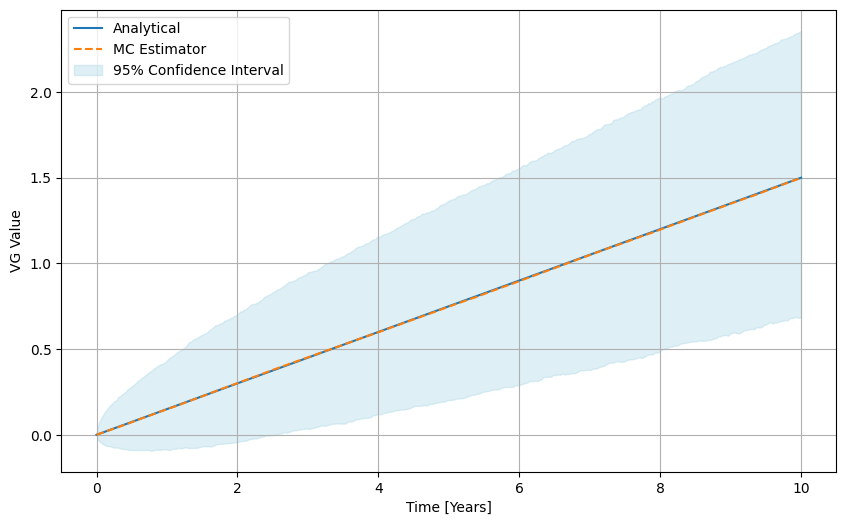

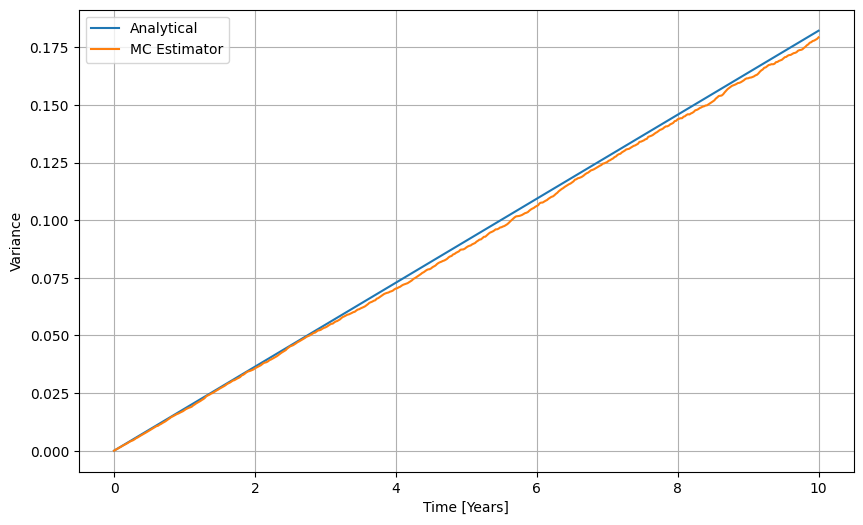

In [8]:
# Calculate mean path and confidence intervals
true_mean_path = theta * time_grid
mean_path = np.mean(VG_paths, axis=0)
conf_interval_low = np.percentile(VG_paths, 2.5, axis=0)
conf_interval_high = np.percentile(VG_paths, 97.5, axis=0)
variance_path = np.var(VG_paths, axis=0)
true_variance_path = (theta ** 2 * nu + sigma ** 2) * time_grid

# Plot the VG paths
plt.figure(figsize=(10, 6))
plt.plot(time_grid, true_mean_path, label='Analytical')
plt.plot(time_grid, mean_path, '--', label='MC Estimator')
plt.fill_between(time_grid, conf_interval_low, conf_interval_high, color='lightblue', alpha=0.4, label='95% Confidence Interval')

# plt.title('Variance Gamma: Mean Path & 95% Confidence intervals')
plt.xlabel('Time [Years]')
plt.ylabel('VG Value')
plt.grid()
plt.legend(loc='upper left')
plt.show()

# Plot the variance
plt.figure(figsize=(10, 6))
plt.plot(time_grid, true_variance_path, label='Analytical')
plt.plot(time_grid, variance_path, label='MC Estimator')
# plt.title('Variance Gamma: Variance of Paths')
plt.xlabel('Time [Years]')
plt.ylabel('Variance')
plt.grid()
plt.legend()
plt.show()

## Sample vs analytical distribution vs time

#### Using the pdf

0 7
1 60
2 120
3 180
4 240
5 300
6 360
7 420
8 480


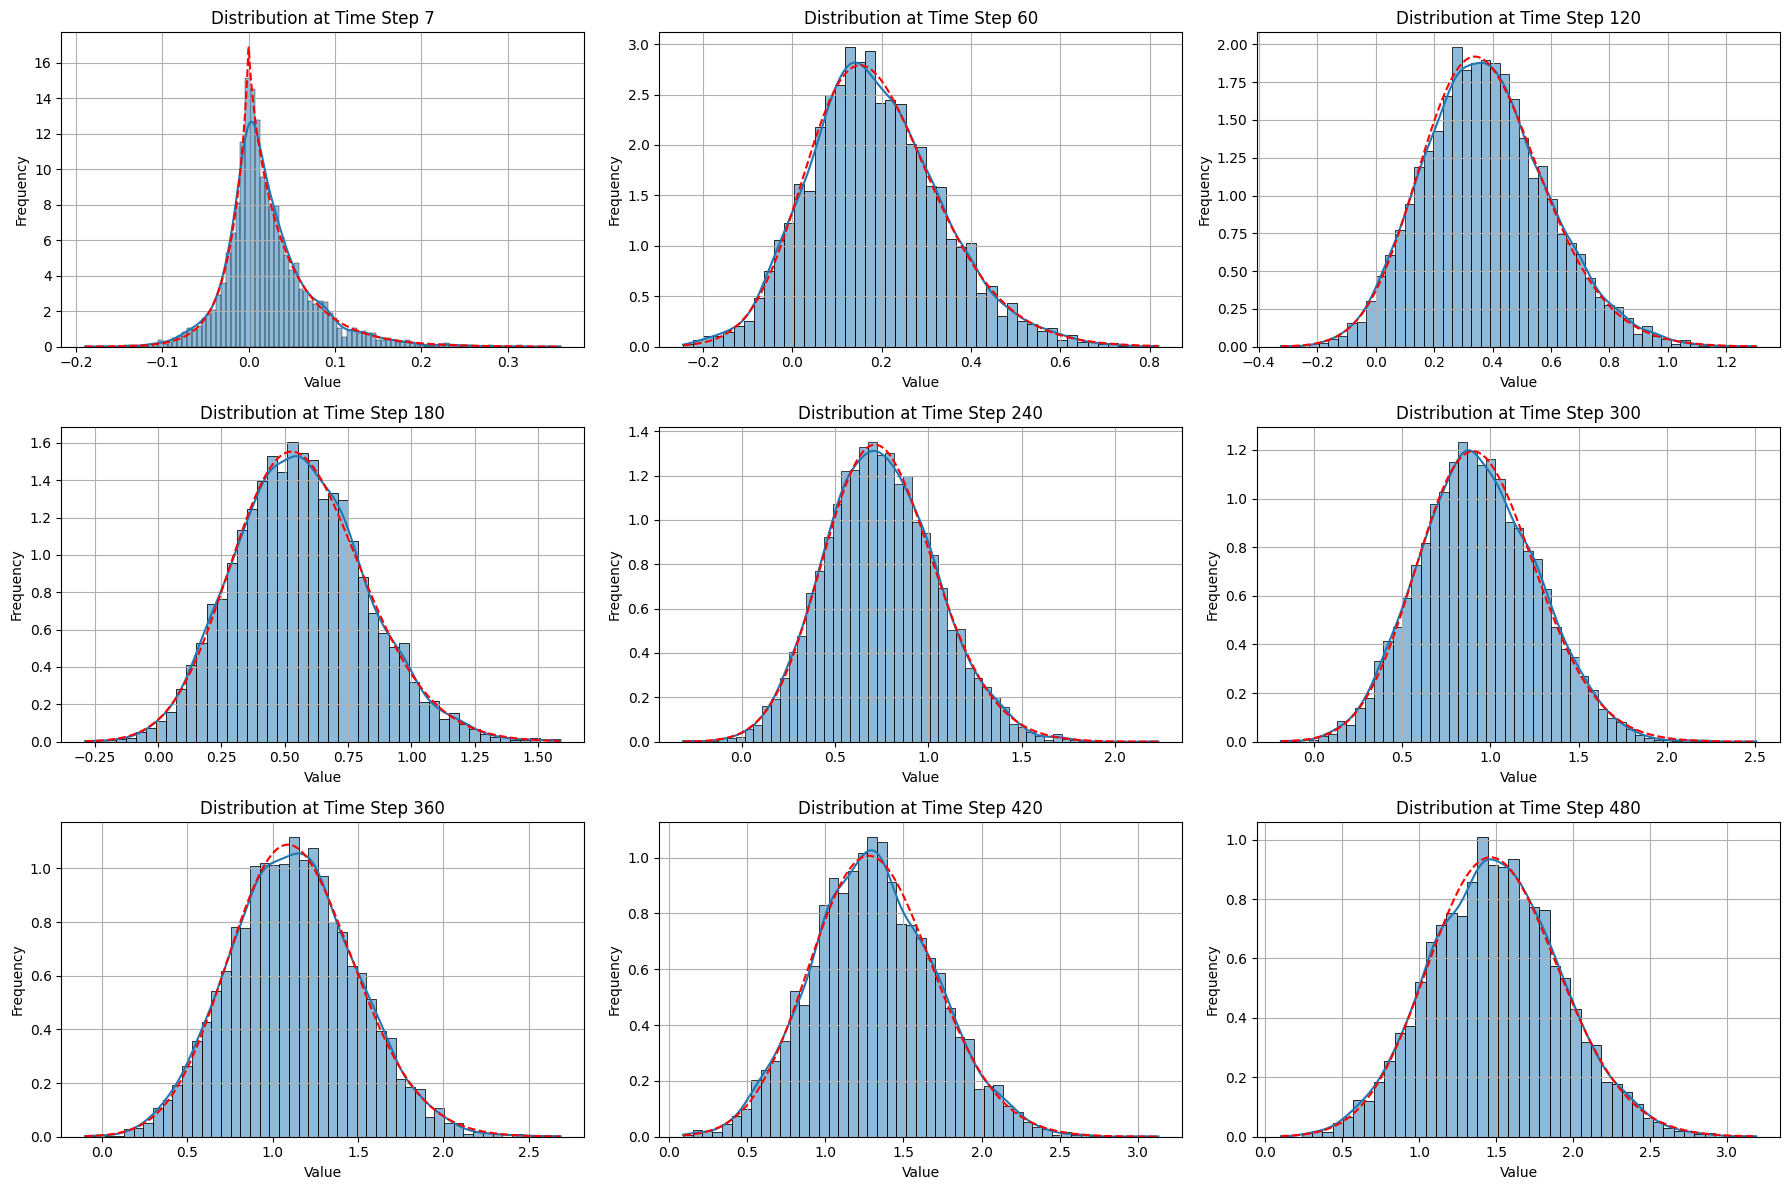

In [9]:
time_steps = np.round(np.array([12.5, 25, 37.5, 50, 62.5, 75, 87.5, 100]) / 100 * (N_time - 1)).astype(int)
time_steps = np.insert(time_steps, 0, 7)

# Define the integrand for the VG pdf
def vg_integrand(g, x, theta, sigma, t, nu):

    if g >= 100:
        g = 100

    integrand = (1 / sigma / np.sqrt(2 * np.pi) * 
            np.exp(- (x - theta * g) ** 2 / (2 * sigma ** 2 * g)) * 
            g ** (t / nu - 3/2) * 
            np.exp(- g / nu) / 
            (nu ** (t / nu) * gamma_function(t / nu)))
    
    return integrand

# Define the VG pdf by integrating the integrand
def vg_pdf(x, theta, sigma, t, nu):
    integral_result, _ = quad(lambda g: vg_integrand(g, x, theta, sigma, t, nu), 0, np.inf)
    return integral_result

# Create subplots
plt.figure(figsize=(18, 12))
for i, k in enumerate(time_steps):
    print(i, k)
    plt.subplot(3, 3, i+1)
    sns.histplot(VG_paths[:, k], kde=True, stat='density') 
    # Plot theoretical VG pdf
    x = np.linspace(VG_paths[:, k].min(), VG_paths[:, k].max(), 1000)
    y = np.array([vg_pdf(xi, theta, sigma, time_grid[k], nu) for xi in x]) 
    plt.plot(x, y, 'r--', label='Theoretical VG')
    plt.title(f"Distribution at Time Step {k}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)

plt.tight_layout()
plt.show()

#### Using the characteristic function

0 7
1 60
2 120
3 180
4 240
5 300
6 360
7 420
8 480


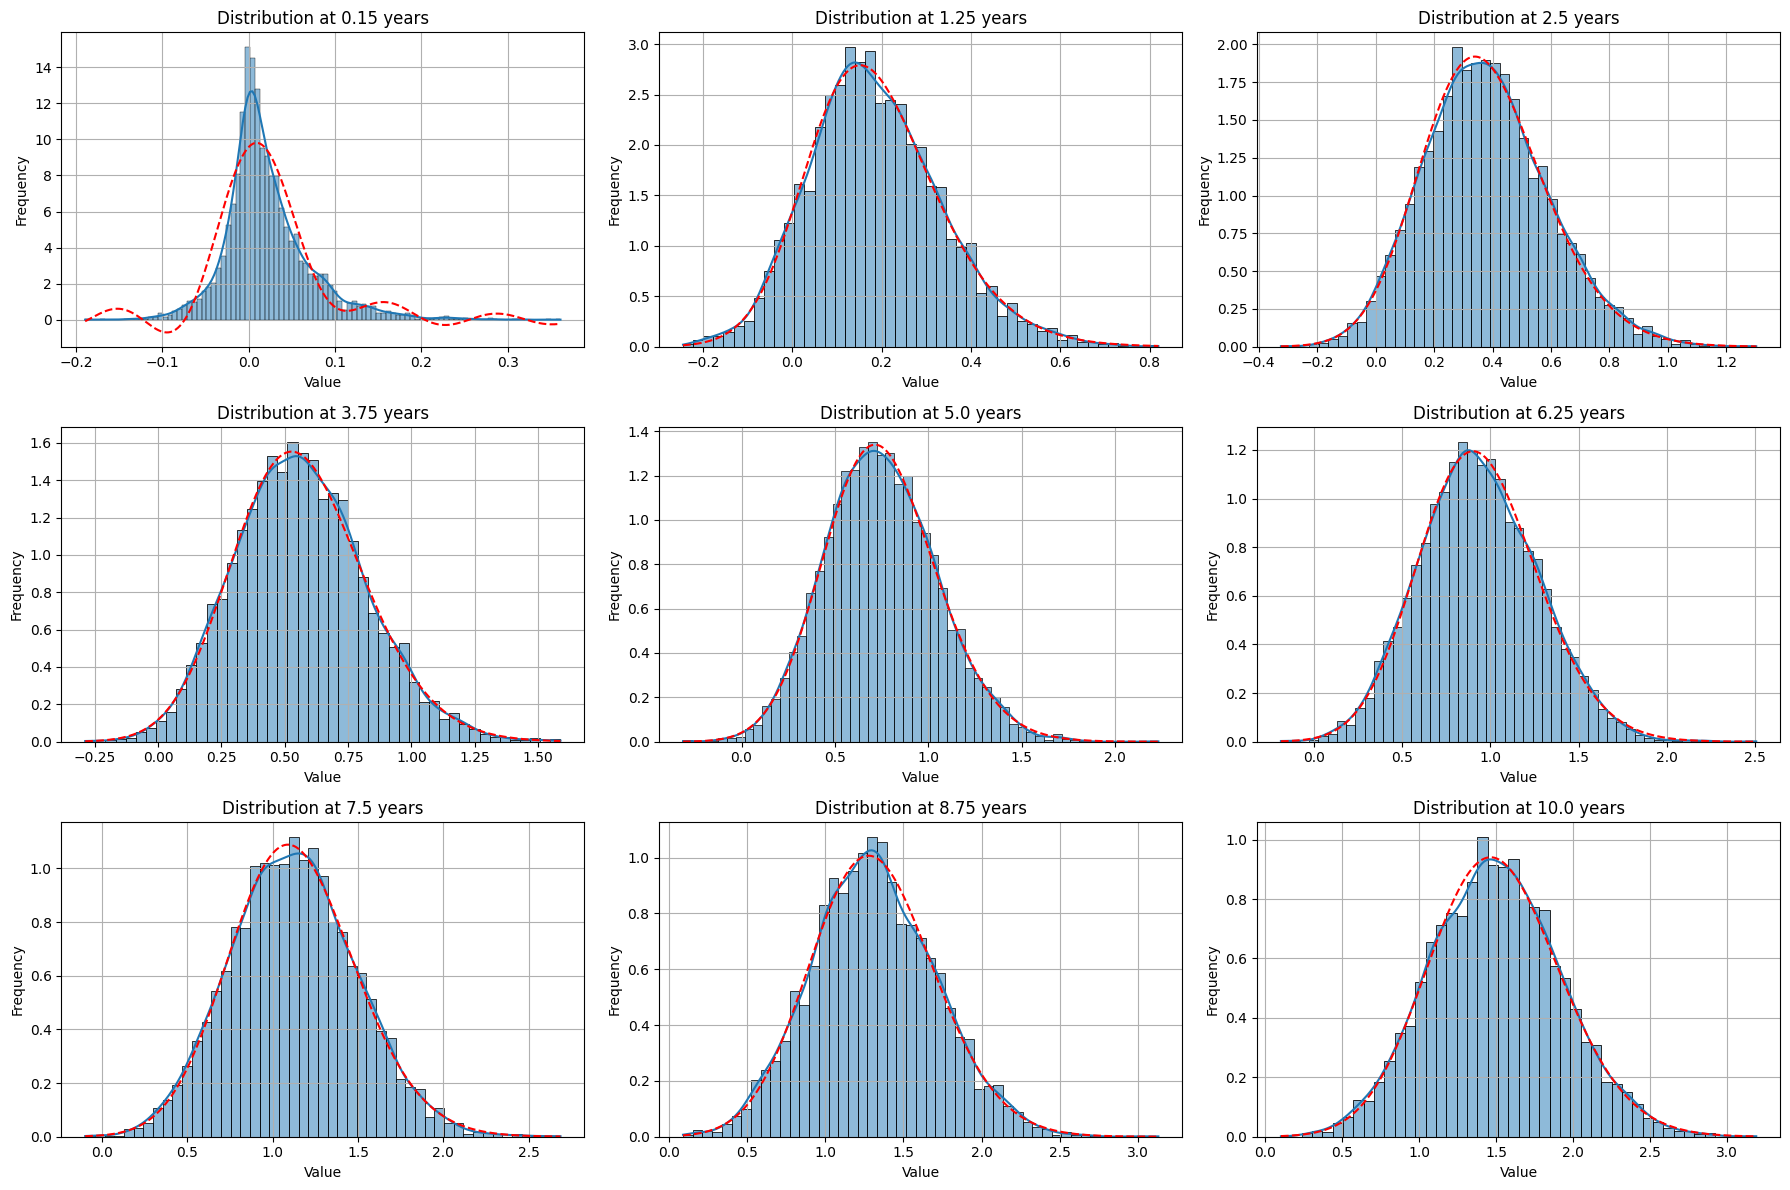

In [10]:
time_steps = np.round(np.array([12.5, 25, 37.5, 50, 62.5, 75, 87.5, 100]) / 100 * (N_time - 1)).astype(int)
time_steps = np.insert(time_steps, 0, 7)
# Range for u
u = np.linspace(-50, 50, 1000)

# Define the characteristic function
def characteristic_function(u, t, nu, theta, sigma):
    return (1 - 1j * theta * nu * u + (sigma ** 2) * nu * u ** 2 / 2) ** (-t / nu)

# Create subplots
plt.figure(figsize=(18, 12))
for i, k in enumerate(time_steps):
    print(i, k)
    plt.subplot(3, 3, i+1)
    sns.histplot(VG_paths[:, k], kde=True, stat='density')

    # Plot theoretical VG pdf
    x = np.linspace(VG_paths[:, k].min(), VG_paths[:, k].max(), 1000)
    
    # Define parameters
    t = time_grid[k]  # Example value for t

    # Compute the characteristic function values
    phi_u = characteristic_function(u, t, nu, theta, sigma)

    pdf = np.zeros_like(x, dtype=np.complex_)

    for i in range(len(x)):
        pdf[i] = np.sum(phi_u * np.exp(-1j * u * x[i])) * (u[1] - u[0]) / (2 * np.pi)

    # Take the real part of the PDF
    pdf = np.real(pdf)

    plt.plot(x, pdf, 'r--', label='Theoretical VG')
    plt.title(f"Distribution at {round(time_grid[k], ndigits=2)} years")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)

plt.tight_layout()
plt.show()

## Sample vs analytical skewness and kurtosis

In [11]:
# Theoritical skewness and kurtosis
skewness = theta * nu * (2 * theta ** 2 * nu + 3 * sigma ** 2) / (theta ** 2 * nu + sigma ** 2) ** (3/2) / time_grid[1:] ** (1/2)

kurtosis = (nu * (3 * sigma ** 4 + 12 * sigma ** 2 * theta ** 2 * nu + 6 * theta ** 4 * nu ** 2) + 
            (3 * sigma ** 4 + 6 * sigma ** 2 * theta ** 2 * nu + 3 * theta ** 4 * nu ** 2) * time_grid[1:]) / (theta ** 2 * nu + sigma ** 2) ** 2 / time_grid[1:]

normal_reference = np.ones_like(time_grid[1:]) * 3


# MC skewness and kurtosis
std_dev_path = np.sqrt(variance_path)

# Calculate centered data
centered_data = VG_paths - mean_path[np.newaxis, :]

# Calculate skewness and kurtosis
skewness_MC = np.mean(centered_data[:, 1:]**3, axis=0) / std_dev_path[1:]**3
kurtosis_MC = np.mean(centered_data[:, 1:]**4, axis=0) / std_dev_path[1:]**4

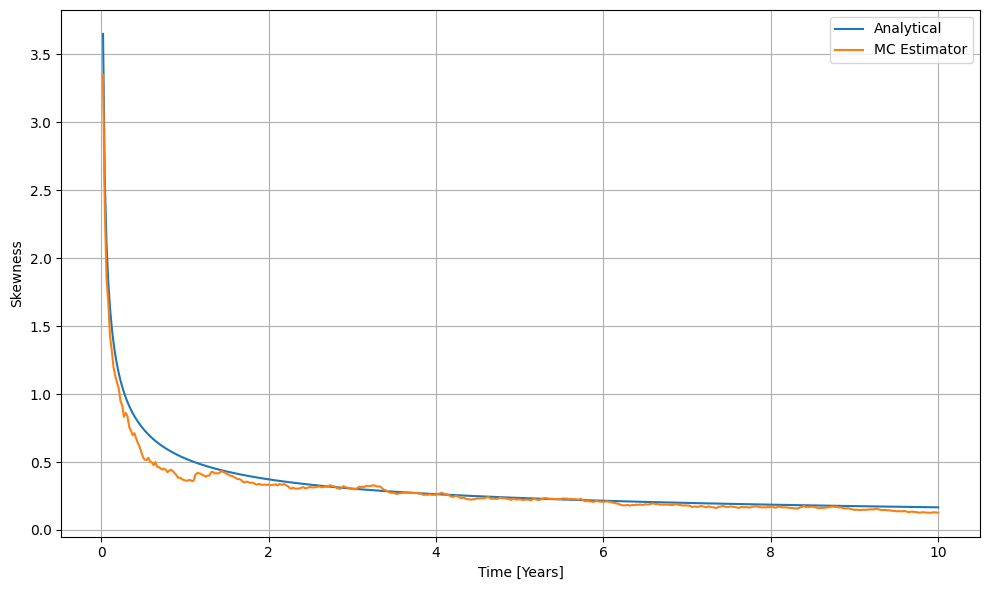

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(time_grid[1:], skewness, label='Analytical')
plt.plot(time_grid[1:], skewness_MC, label='MC Estimator')
# plt.title(f"Skewness vs Time")
plt.xlabel("Time [Years]")
plt.ylabel("Skewness")
plt.grid(True)

plt.tight_layout()
plt.legend()
plt.show()

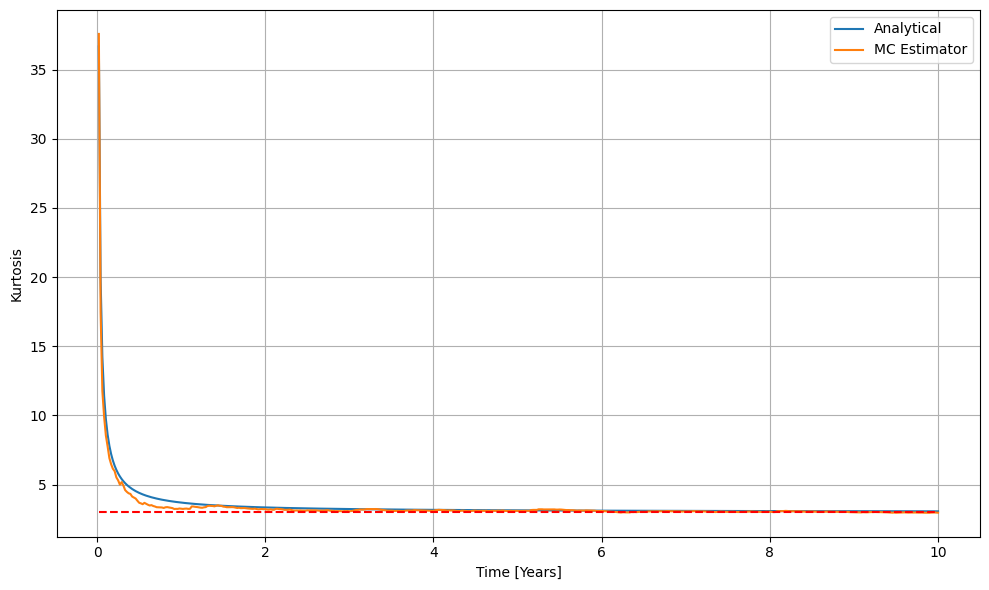

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(time_grid[1:], kurtosis, label='Analytical')
plt.plot(time_grid[1:], kurtosis_MC, label='MC Estimator')
plt.plot(time_grid[1:], normal_reference, 'r--')
# plt.title(f"Kurtosis vs Time")
plt.xlabel("Time [Years]")
plt.ylabel("Kurtosis")
plt.grid(True)

plt.tight_layout()
plt.legend()
plt.show()

In [14]:
print(skewness[-1])
print(kurtosis[-1])

0.16665940700091794
3.070160951074532


## Mapping skewness and kurtosis

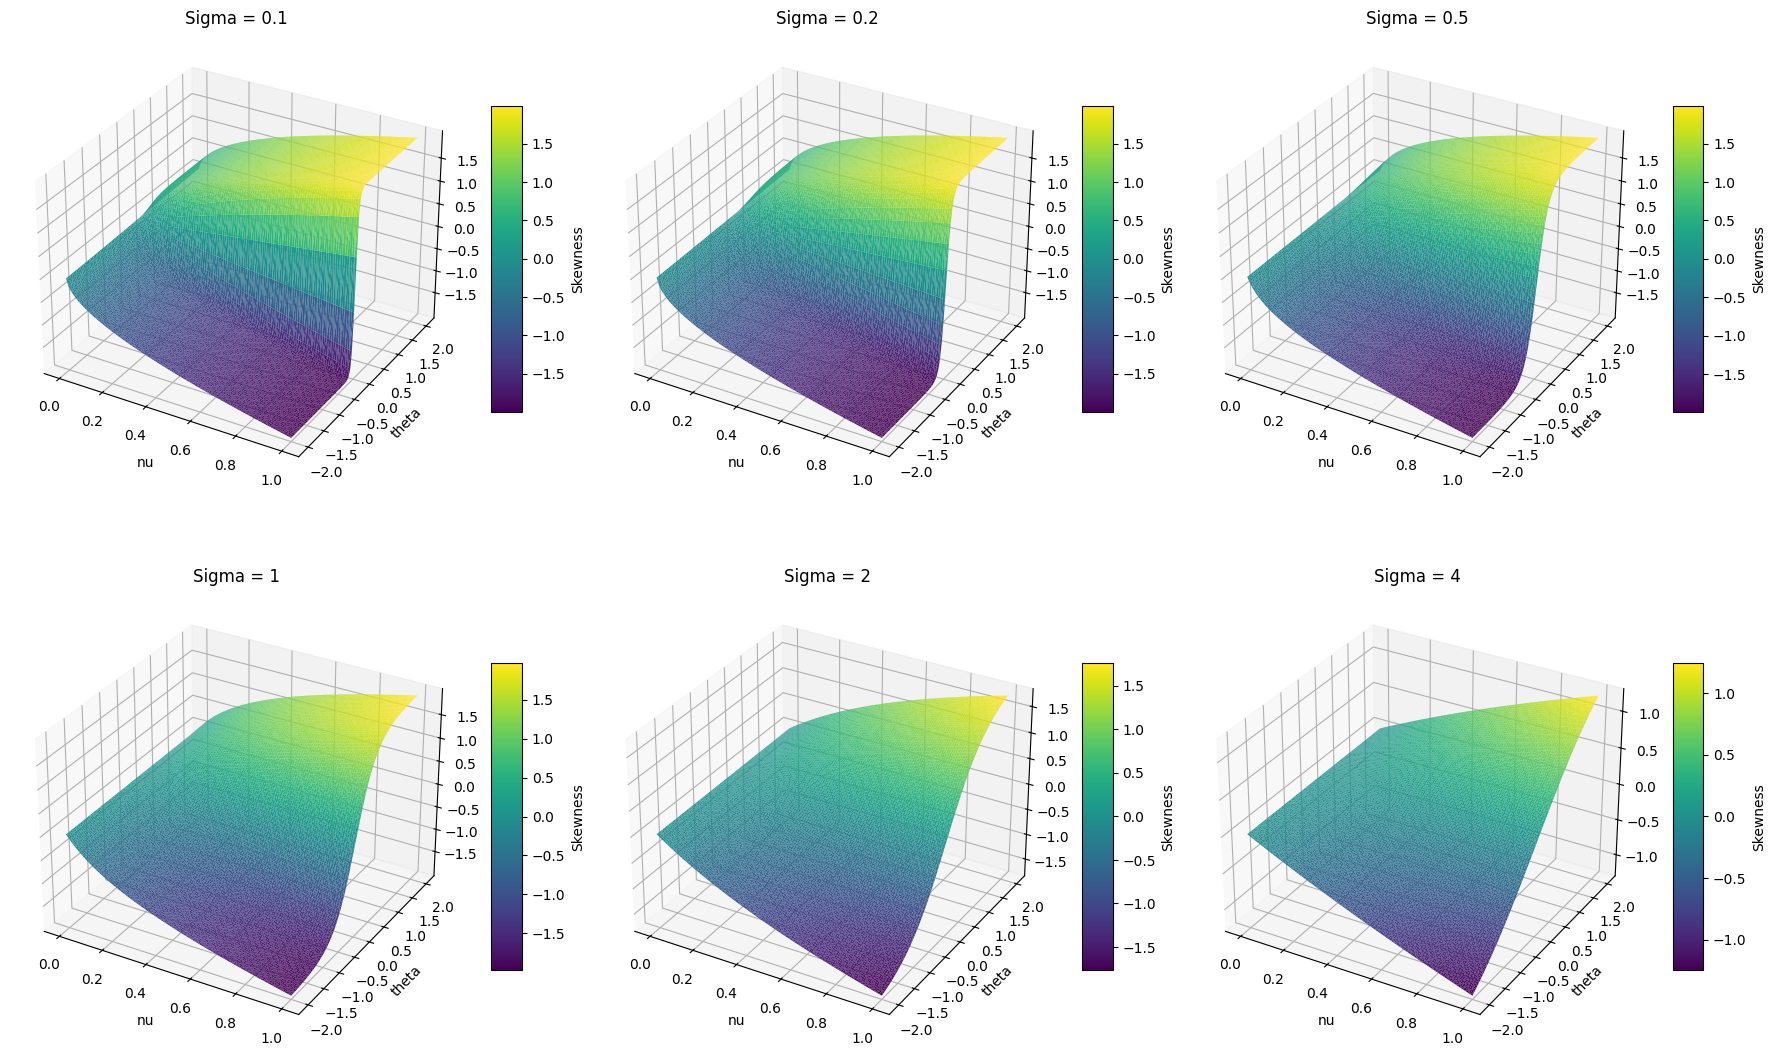

In [15]:
# Define parameter ranges
nu_range = np.linspace(0.001, 1, 100)
theta_range = np.linspace(-2, 2, 100)
sigma_range = np.linspace(0, 5, 100)

# Create meshgrid for parameter combinations
nu_mesh, theta_mesh, sigma_mesh = np.meshgrid(nu_range, theta_range, sigma_range, indexing='ij')

# Function to calculate skewness for a given sigma
def calculate_skewness(nu, theta, sigma, final_time):
    return theta * nu * (2 * theta ** 2 * nu + 3 * sigma ** 2) / (theta ** 2 * nu + sigma ** 2) ** (3/2) / final_time ** (1/2)

# Create figure and subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12), subplot_kw={'projection': '3d'})
axs = axs.flatten()

# Define combinations of sigma
sigmas = [0.1, 0.2, 0.5, 1, 2, 4]

for i, sigma in enumerate(sigmas):
    # Calculate skewness for the current sigma
    ss_skewness = calculate_skewness(nu_mesh, theta_mesh, sigma, 1)
    
    # Plot
    surf = axs[i].plot_trisurf(nu_mesh.flatten(), theta_mesh.flatten(), ss_skewness.flatten(), cmap='viridis')
    
    # Labels and title for each subplot
    axs[i].set_xlabel('nu')
    axs[i].set_ylabel('theta')
    # axs[i].set_zlabel('Skewness')
    axs[i].set_title(f'Sigma = {sigma}')
    
    # Colorbar
    cbar = fig.colorbar(surf, ax=axs[i], shrink=0.5, aspect=10)
    cbar.set_label('Skewness')

plt.tight_layout()
plt.show()

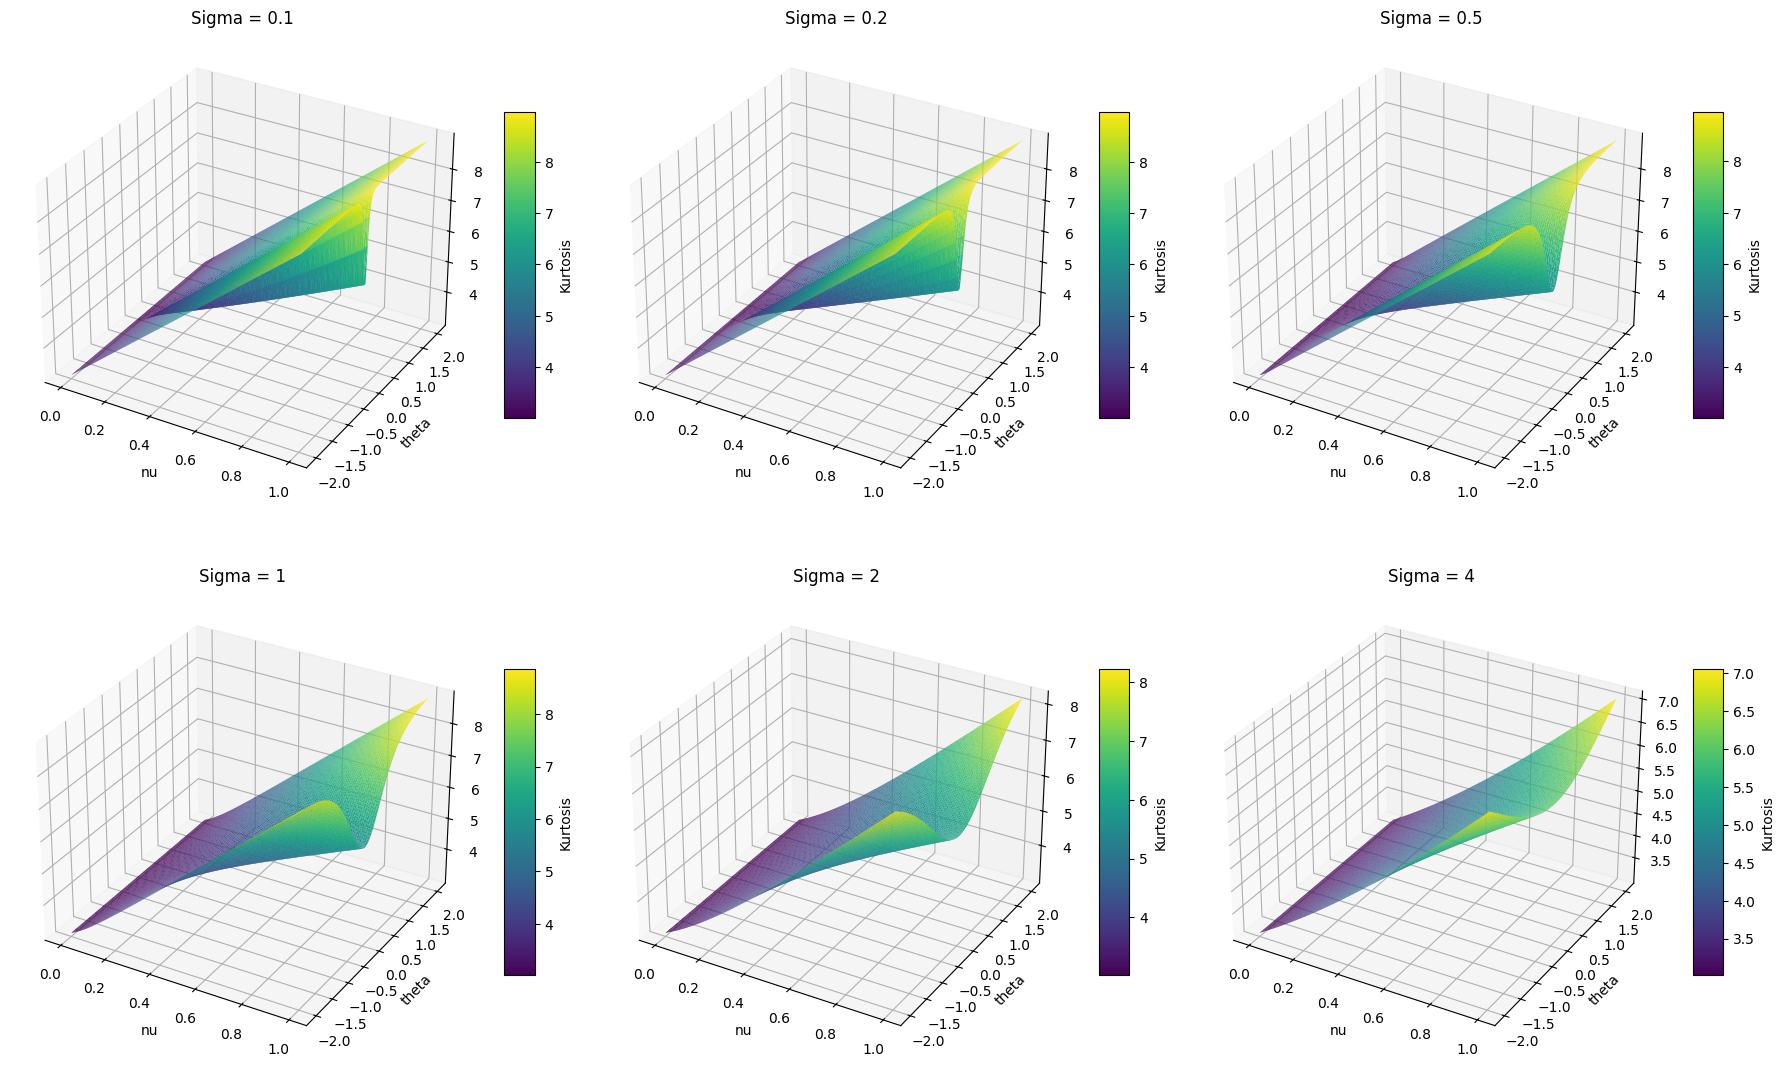

In [16]:
# Function to calculate kurtosis for a given sigma
def calculate_kurtosis(nu, theta, sigma, final_time):
    return (nu * (3 * sigma ** 4 + 12 * sigma ** 2 * theta ** 2 * nu + 6 * theta ** 4 * nu ** 2) + 
            (3 * sigma ** 4 + 6 * sigma ** 2 * theta ** 2 * nu + 3 * theta ** 4 * nu ** 2) * final_time) / (theta ** 2 * nu + sigma ** 2) ** 2 / final_time

# Create figure and subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12), subplot_kw={'projection': '3d'})
axs = axs.flatten()

# Define combinations of sigma
sigmas = [0.1, 0.2, 0.5, 1, 2, 4]

for i, sigma in enumerate(sigmas):
    # Calculate kurtosis for the current sigma
    ss_kurtosis = calculate_kurtosis(nu_mesh, theta_mesh, sigma, 1)
    
    # Plot
    surf = axs[i].plot_trisurf(nu_mesh.flatten(), theta_mesh.flatten(), ss_kurtosis.flatten(), cmap='viridis')
    
    # Labels and title for each subplot
    axs[i].set_xlabel('nu')
    axs[i].set_ylabel('theta')
    # axs[i].set_zlabel('Kurtosis')
    axs[i].set_title(f'Sigma = {sigma}')
    
    # Colorbar
    cbar = fig.colorbar(surf, ax=axs[i], shrink=0.5, aspect=10)
    cbar.set_label('Kurtosis')

plt.tight_layout()
plt.show()

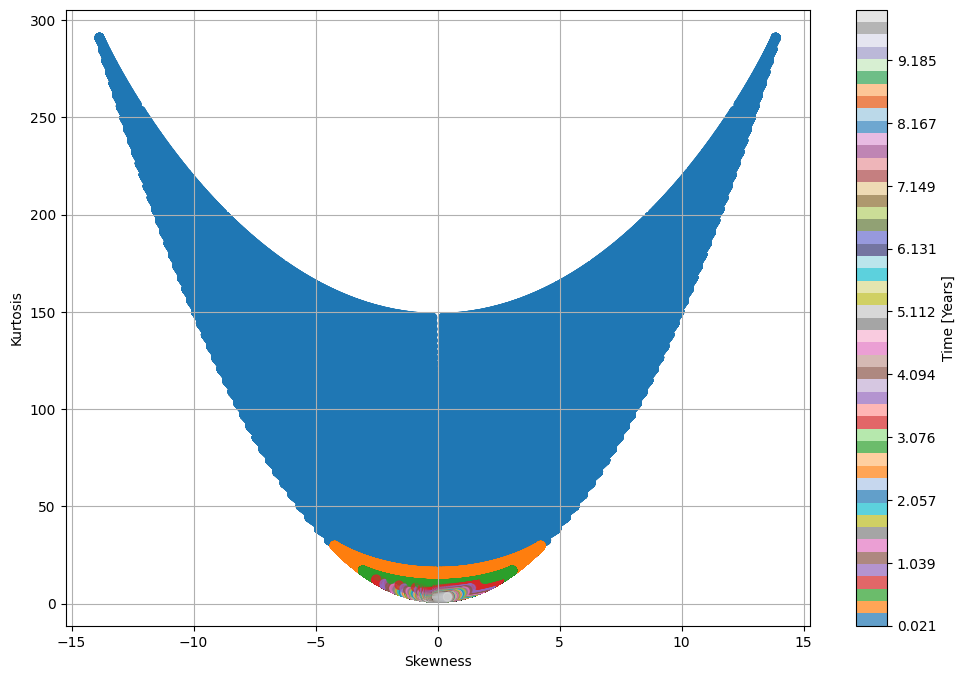

In [17]:
# Combine tab10, tab20, tab20b, and tab20c to get 50 distinct colors
tab10 = plt.get_cmap('tab10')
tab20 = plt.get_cmap('tab20')
tab20b = plt.get_cmap('tab20b')
tab20c = plt.get_cmap('tab20c')

colors = np.vstack((tab10(np.linspace(0, 1, 10)),
                    tab20(np.linspace(0, 1, 20)),
                    tab20b(np.linspace(0, 1, 10)),
                    tab20c(np.linspace(0, 1, 10))))

distinct_colors = ListedColormap(colors)

# Define parameter ranges
nu_range = np.linspace(0.001, 1, 50)  # Reduced granularity for efficiency
theta_range = np.linspace(-2, 2, 50)
sigma_range = np.linspace(0, 4, 50)  # Specific values
time_grid = np.linspace(1/4/12, 10, 50)  # Example time points

# Create meshgrid for parameter combinations including time
nu_mesh, theta_mesh, sigma_mesh, time_mesh = np.meshgrid(nu_range, theta_range, sigma_range, time_grid, indexing='ij')

# Function to calculate skewness
def calculate_skewness(nu, theta, sigma, time):
    return theta * nu * (2 * theta ** 2 * nu + 3 * sigma ** 2) / (theta ** 2 * nu + sigma ** 2) ** (3/2) / np.sqrt(time)

# Function to calculate kurtosis
def calculate_kurtosis(nu, theta, sigma, time):
    return (nu * (3 * sigma ** 4 + 12 * sigma ** 2 * theta ** 2 * nu + 6 * theta ** 4 * nu ** 2) + 
            (3 * sigma ** 4 + 6 * sigma ** 2 * theta ** 2 * nu + 3 * theta ** 4 * nu ** 2) * time) / (theta ** 2 * nu + sigma ** 2) ** 2 / time

# Calculate skewness and kurtosis for all combinations
ss_skewness = calculate_skewness(nu_mesh, theta_mesh, sigma_mesh, time_mesh)
ss_kurtosis = calculate_kurtosis(nu_mesh, theta_mesh, sigma_mesh, time_mesh)

# Flatten data for plotting
skewness_flat = ss_skewness.flatten()
kurtosis_flat = ss_kurtosis.flatten()
time_flat = time_mesh.flatten()

# Create scatter plot of skewness vs kurtosis with discrete colors representing time
plt.figure(figsize=(12, 8))
scatter = plt.scatter(skewness_flat, kurtosis_flat, c=time_flat, cmap=distinct_colors, alpha=0.7)
plt.grid(True)

# Add a color bar to the plot
cbar = plt.colorbar(scatter, ticks=np.linspace(time_flat.min(), time_flat.max(), 50))
cbar.set_label('Time [Years]')
cbar.set_ticks([time_grid[i] for i in range(0, 50, 5)])  # Adjust the ticks to show every 5th time step

# Labels and title for the plot
plt.xlabel('Skewness')
plt.ylabel('Kurtosis')
# plt.title('Skewness vs Kurtosis for varying nu, theta, sigma, and time')

plt.show()

In [18]:
3+3/time_grid[1]

16.363636363636363

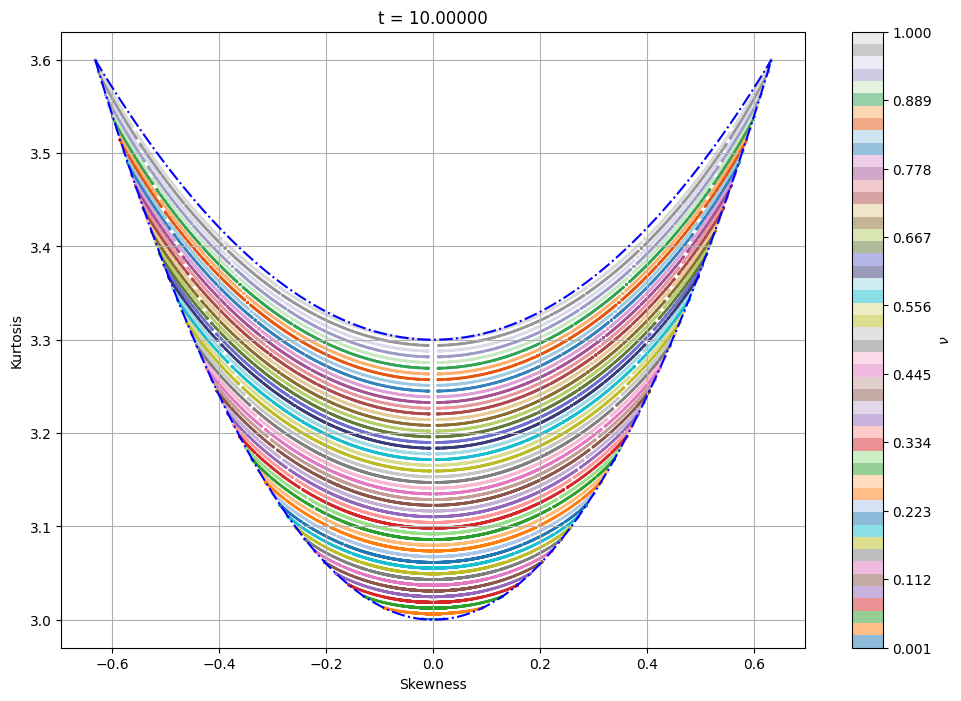

In [19]:
# Select the data for t = 1/12/4
t_selected =  10 #1 / 12 / 4 #10
indices = np.isclose(time_mesh, t_selected)
skewness_selected = ss_skewness[indices]
kurtosis_selected = ss_kurtosis[indices]
nu_selected = nu_mesh[indices]

# Plot skewness vs kurtosis for selected time
plt.figure(figsize=(12, 8))
scatter = plt.scatter(skewness_selected, kurtosis_selected, c=nu_selected, cmap=distinct_colors, alpha=0.5, s=1)
plt.grid(True)

# Add a color bar to the plot
cbar = plt.colorbar(scatter)
cbar.set_label(r'$\nu$')
cbar.set_ticks(np.linspace(nu_selected.min(), nu_selected.max(), 10))  # Adjust the ticks to show

# Plot the functions y = 3/4 x^2 + 3 + 3*nu/t and y = 6/4 x^2 + 3
x_range = np.linspace(-2 * np.sqrt(nu_range / t_selected), 2 * np.sqrt(nu_range / t_selected), 100)

# for nu in nu_range:
nu = 1
x = np.linspace(-2 * np.sqrt(nu / t_selected), 2 * np.sqrt(nu / t_selected), 100)
y1 = 3 / 4 * x**2 + 3 + 3 * nu / t_selected
y2 = 6 / 4 * x**2 + 3
plt.plot(x, y1, 'b-.')
plt.plot(x, y2, 'b-.')

# Labels and title for the plot
plt.xlabel('Skewness')
plt.ylabel('Kurtosis')
plt.title(f't = {t_selected:.5f}')

plt.show()

In [20]:
print(nu_selected.shape)

(125000,)


In [21]:
# Select the data for t = 1/12/4 and nu = 1
t_selected = 1 / 12 / 4
nu_selected_value = 1
indices = np.isclose(time_mesh, t_selected) & np.isclose(nu_mesh, nu_selected_value)
skewness_selected = ss_skewness[indices]
kurtosis_selected = ss_kurtosis[indices]
theta_selected = theta_mesh[indices]
sigma_selected = sigma_mesh[indices]

# Combine results into a structured array for display

data = {
    'Skewness': skewness_selected,
    'Kurtosis': kurtosis_selected
}

df = pd.DataFrame(data)
file_path = r"C:\Users\spyro\OneDrive - University of Edinburgh\Dissertation\Week 5\skewness_kurtosis_t_1_12_4_nu_1.xlsx"
df.to_excel(file_path, index=False)

In [22]:
# Find min and max skewness for each nu and the corresponding kurtoses
results = []
for nu in nu_range:
    indices = np.isclose(nu_mesh, nu)
    skewness_nu = ss_skewness[indices]
    kurtosis_nu = ss_kurtosis[indices]
    
    min_skewness = np.min(skewness_nu)
    max_skewness = np.max(skewness_nu)
    min_kurtosis = kurtosis_nu[np.argmin(skewness_nu)]
    max_kurtosis = kurtosis_nu[np.argmax(skewness_nu)]
    
    results.append({
            'Skewness': min_skewness,
            'Kurtosis': min_kurtosis
        })
        
    results.append({
        'Skewness': max_skewness,
        'Kurtosis': max_kurtosis
    })

df_results = pd.DataFrame(results)

# Save the DataFrame to an Excel file
file_path_min_kurtosis = r"C:\Users\spyro\OneDrive - University of Edinburgh\Dissertation\Week 5\skewness_min_kurtosis_t_1_12_4_nu_1.xlsx"
df_results.to_excel(file_path_min_kurtosis, index=False)

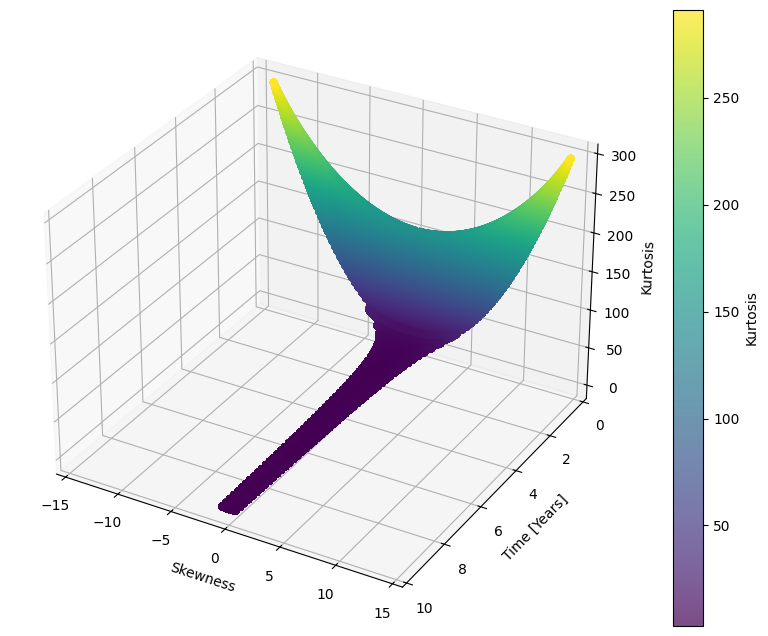

In [13]:

# Define parameter ranges
nu_range = np.linspace(0.001, 1, 50)  # Reduced granularity for efficiency
theta_range = np.linspace(-2, 2, 50)
sigma_range = np.linspace(0, 4, 50)  # Specific values
time_grid = np.linspace(1/12/4, 10, 50)  # Example time points 1/4/12

# Create meshgrid for parameter combinations including time
nu_mesh, theta_mesh, sigma_mesh, time_mesh = np.meshgrid(nu_range, theta_range, sigma_range, time_grid, indexing='ij')

# Function to calculate skewness
def calculate_skewness(nu, theta, sigma, time):
    return theta * nu * (2 * theta ** 2 * nu + 3 * sigma ** 2) / (theta ** 2 * nu + sigma ** 2) ** (3/2) / np.sqrt(time)

# Function to calculate kurtosis
def calculate_kurtosis(nu, theta, sigma, time):
    return (nu * (3 * sigma ** 4 + 12 * sigma ** 2 * theta ** 2 * nu + 6 * theta ** 4 * nu ** 2) + 
            (3 * sigma ** 4 + 6 * sigma ** 2 * theta ** 2 * nu + 3 * theta ** 4 * nu ** 2) * time) / (theta ** 2 * nu + sigma ** 2) ** 2 / time

# Calculate skewness and kurtosis for all combinations
ss_skewness = calculate_skewness(nu_mesh, theta_mesh, sigma_mesh, time_mesh)
ss_kurtosis = calculate_kurtosis(nu_mesh, theta_mesh, sigma_mesh, time_mesh)

# Flatten data for plotting
skewness_flat = ss_skewness.flatten()
kurtosis_flat = ss_kurtosis.flatten()
time_flat = time_mesh.flatten()

# Create 3D scatter plot of skewness vs kurtosis with time as the third dimension
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(skewness_flat, time_flat, kurtosis_flat, c=kurtosis_flat, cmap='viridis', alpha=0.7)

# Set reversed y-axis limits
ax.set_ylim(10, 0)

# Labels and title for the plot
ax.set_xlabel('Skewness')
ax.set_zlabel('Kurtosis')
ax.set_ylabel('Time [Years]')
# ax.set_title('Skewness vs Kurtosis vs Time for varying nu, theta, and sigma')

# Add color bar which maps values to colors
cbar = plt.colorbar(sc)
cbar.set_label('Kurtosis')

plt.show()
